In [7]:
# Week 2 Lab: Data Preprocessing and Exploratory Data Analysis
# CDS 403 Machine Learning - Spring 2025

"""
Lab Objectives:
1. Learn to load and inspect datasets using pandas
2. Perform basic data cleaning and preprocessing
3. Conduct exploratory data analysis
4. Create meaningful visualizations
5. Practice feature engineering

Dataset: We'll use the California Housing dataset from scikit-learn as an example
"""

"\nLab Objectives:\n1. Learn to load and inspect datasets using pandas\n2. Perform basic data cleaning and preprocessing\n3. Conduct exploratory data analysis\n4. Create meaningful visualizations\n5. Practice feature engineering\n\nDataset: We'll use the California Housing dataset from scikit-learn as an example\n"

In [12]:
# Part 1: Setup and Data Loading
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

print("Step 1: Initial Data Inspection")
print("-" * 50)
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nColumn information:")
print(df.info())

Step 1: Initial Data Inspection
--------------------------------------------------

First few rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Dataset shape: (20640, 9)

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    

In [13]:
#plt.style.available

In [14]:
# Part 2: Basic Data Cleaning
# --------------------------
print("\nStep 2: Data Cleaning")
print("-" * 50)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Basic statistics of the dataset
print("\nBasic statistics of numerical columns:")
print(df.describe())


Step 2: Data Cleaning
--------------------------------------------------

Missing values in each column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Number of duplicate rows: 0

Basic statistics of numerical columns:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000   


Step 3: Exploratory Data Analysis
--------------------------------------------------


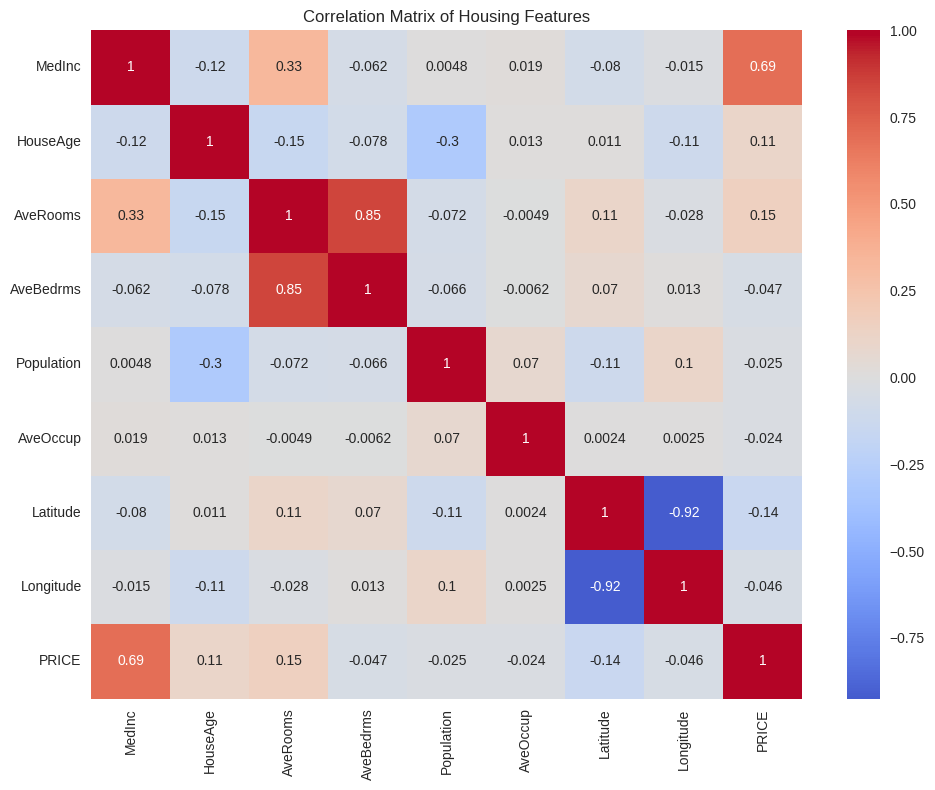

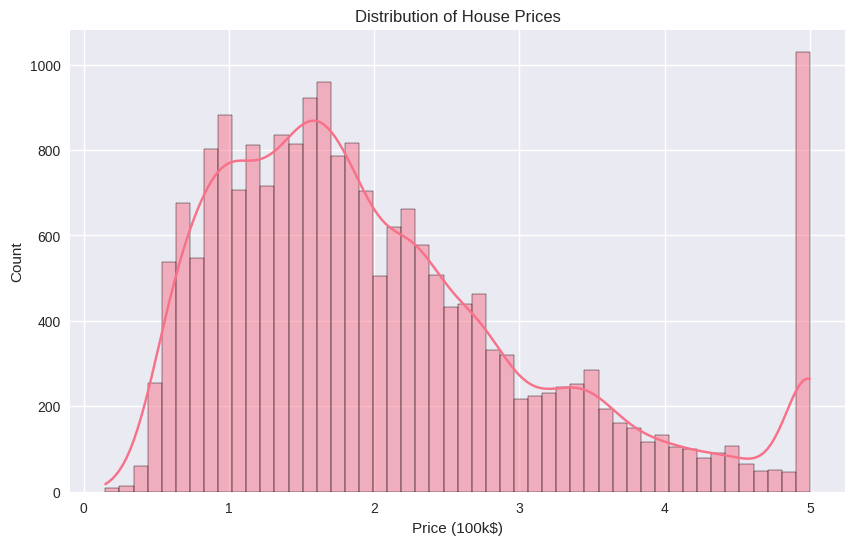

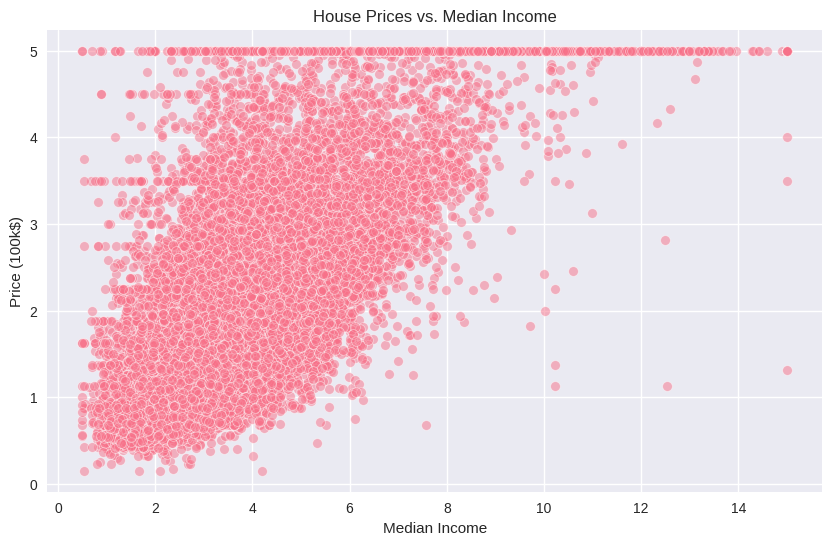

In [15]:
# Part 3: Exploratory Data Analysis
# -------------------------------
print("\nStep 3: Exploratory Data Analysis")
print("-" * 50)

# Create a correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Housing Features')
plt.tight_layout()
plt.show()

# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PRICE', bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (100k$)')
plt.ylabel('Count')
plt.show()

# Relationship between median income and house prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MedInc', y='PRICE', alpha=0.5)
plt.title('House Prices vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Price (100k$)')
plt.show()

In [16]:
# Part 4: Feature Engineering
# -------------------------
print("\nStep 4: Feature Engineering")
print("-" * 50)

# Create new features
df['PRICE_PER_ROOM'] = df['PRICE'] / df['AveRooms']
df['INCOME_PER_PERSON'] = df['MedInc'] / df['AveOccup']
df['AGE_CATEGORY'] = pd.qcut(df['HouseAge'], q=4, labels=['New', 'Medium', 'Old', 'Very Old'])

print("\nNew features added:")
print(df[['PRICE_PER_ROOM', 'INCOME_PER_PERSON', 'AGE_CATEGORY']].head())


Step 4: Feature Engineering
--------------------------------------------------

New features added:
   PRICE_PER_ROOM  INCOME_PER_PERSON AGE_CATEGORY
0        0.648041           3.257687     Very Old
1        0.574691           3.934608       Medium
2        0.424824           2.589838     Very Old
3        0.586693           2.214765     Very Old
4        0.544744           1.763125     Very Old


In [17]:
# Part 5: Data Preprocessing
# ------------------------
print("\nStep 5: Data Preprocessing")
print("-" * 50)

# Separate features and target
X = df.drop(['PRICE', 'AGE_CATEGORY'], axis=1)
y = df['PRICE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled feature statistics:")
print(pd.DataFrame(X_train_scaled).describe())


Step 5: Data Preprocessing
--------------------------------------------------

Training set shape: (16512, 10)
Test set shape: (4128, 10)

Scaled feature statistics:
                  0             1             2             3             4  \
count  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04   
mean  -6.519333e-17 -9.251859e-18 -1.981081e-16 -1.707291e-16 -2.151595e-19   
std    1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00   
min   -1.775438e+00 -2.190766e+00 -1.904386e+00 -1.762117e+00 -1.251913e+00   
25%   -6.900689e-01 -8.417859e-01 -4.118373e-01 -2.081645e-01 -5.606339e-01   
50%   -1.758995e-01  3.108328e-02 -8.350905e-02 -1.094160e-01 -2.281865e-01   
75%    4.686502e-01  6.658972e-01  2.621376e-01  8.455177e-03  2.634487e-01   
max    5.839268e+00  1.856173e+00  5.716655e+01  5.664727e+01  3.012743e+01   

                  5             6             7             8             9  
count  1.651200e+04  1.651200e+04  1.651200

In [18]:
# Part 6: Exercise for Students
# ---------------------------
"""
Exercises for students to complete:

1. Calculate and visualize the average house price by AGE_CATEGORY
2. Create a new feature that represents population density (population per household)
3. Identify and handle any outliers in the dataset
4. Create a pair plot for any four features of your choice
5. Implement a function to detect and remove outliers using the IQR method

Additional challenges:
1. Create a custom visualization that shows the geographical distribution of prices
2. Implement a feature selection method based on correlation analysis
3. Create a function to automatically generate summary statistics for categorical variables
"""

# Function template for outlier detection (students to complete)
def detect_outliers(df, column, threshold=1.5):
    """
    Detect outliers in a column using the IQR method.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataset
    column : str
        Column name to check for outliers
    threshold : float
        IQR multiplier for outlier detection

    Returns:
    --------
    pandas.Series
        Boolean series indicating outlier status
    """
    # TO DO: Implement outlier detection using IQR method
    pass

# Print final instructions
print("\nLab Completion:")
print("-" * 50)
print("1. Review the generated visualizations")
print("2. Complete the exercises in Part 6")
print("3. Document your findings and insights")
print("4. Submit your completed notebook with solutions")


Lab Completion:
--------------------------------------------------
1. Review the generated visualizations
2. Complete the exercises in Part 6
3. Document your findings and insights
4. Submit your completed notebook with solutions


<ipython-input-32-ba4adc2c7cd9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_age_category = df.groupby('AGE_CATEGORY')['PRICE'].mean()


AGE_CATEGORY
New         1.932760
Medium      2.051372
Old         2.067795
Very Old    2.234164
Name: PRICE, dtype: float64


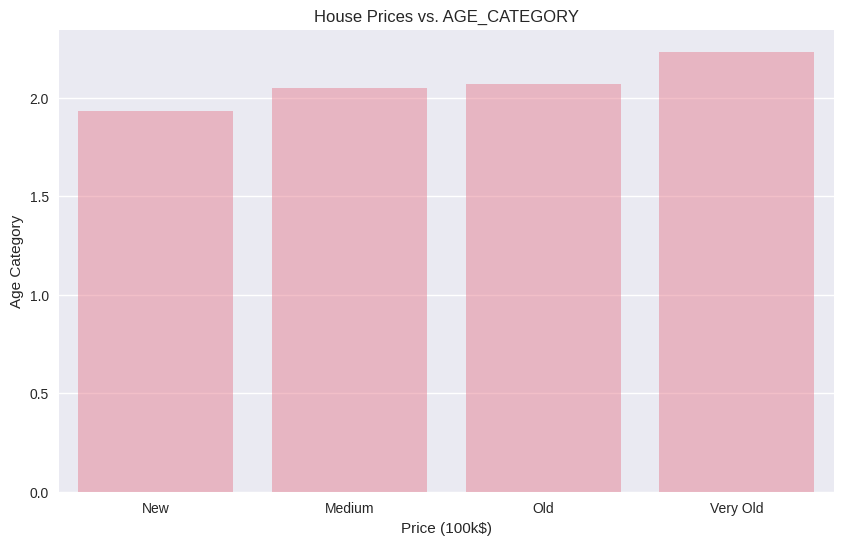

In [32]:
#1. Calculate and visualize the average house price by AGE_CATEGORY

#print(df.head())

avg_price_by_age_category = df.groupby('AGE_CATEGORY')['PRICE'].mean()
print(avg_price_by_age_category)

# Relationship between median income and house prices
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_age_category.index, y=avg_price_by_age_category.values, alpha=0.5)
plt.title('House Prices vs. AGE_CATEGORY')
plt.xlabel('Price (100k$)')
plt.ylabel('Age Category')
plt.show()

In [38]:
#2. Create a new feature that represents population density (population per household)

df['POP_DENSITY'] = df['AveOccup'] / df['AveRooms']

print("\nNew features added:")
print(df.head())

df.drop(['POP_DENSITY'], axis=1)


New features added:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  PRICE_PER_ROOM  INCOME_PER_PERSON AGE_CATEGORY  \
0    -122.23  4.526        0.648041           3.257687     Very Old   
1    -122.22  3.585        0.574691           3.934608       Medium   
2    -122.24  3.521        0.424824           2.589838     Very Old   
3    -122.25  3.413        0.586693           2.214765     Very Old   
4    -122.25  3.422        0.544744           1.763125     Very Old   

   POP_DENSITY  
0     0.365909  
1     0.338217  
2     0.338105  
3     0.437991  
4     0.34

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE,PRICE_PER_ROOM,INCOME_PER_PERSON,AGE_CATEGORY
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.648041,3.257687,Very Old
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.574691,3.934608,Medium
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.424824,2.589838,Very Old
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.586693,2.214765,Very Old
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.544744,1.763125,Very Old
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.154793,0.609348,Medium
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.126103,0.818751,New
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.177311,0.730983,New
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.158926,0.879423,New
